# Notebook 2: Visualización de Datos

**Objetivo:** Crear gráficos básicos y avanzados con Matplotlib, Seaborn y Plotly

**Autor:** JOSE LUIS RODRIGUEZ FLORES
**Fecha:** 23 NOVIEMBRE 2025

In [7]:
# Importar TensorFlow
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente")

GPU disponible: []
Entorno configurado correctamente


## Parte 1: Gráficos Básicos con Matplotlib
#  Gráficos de línea y dispersión:

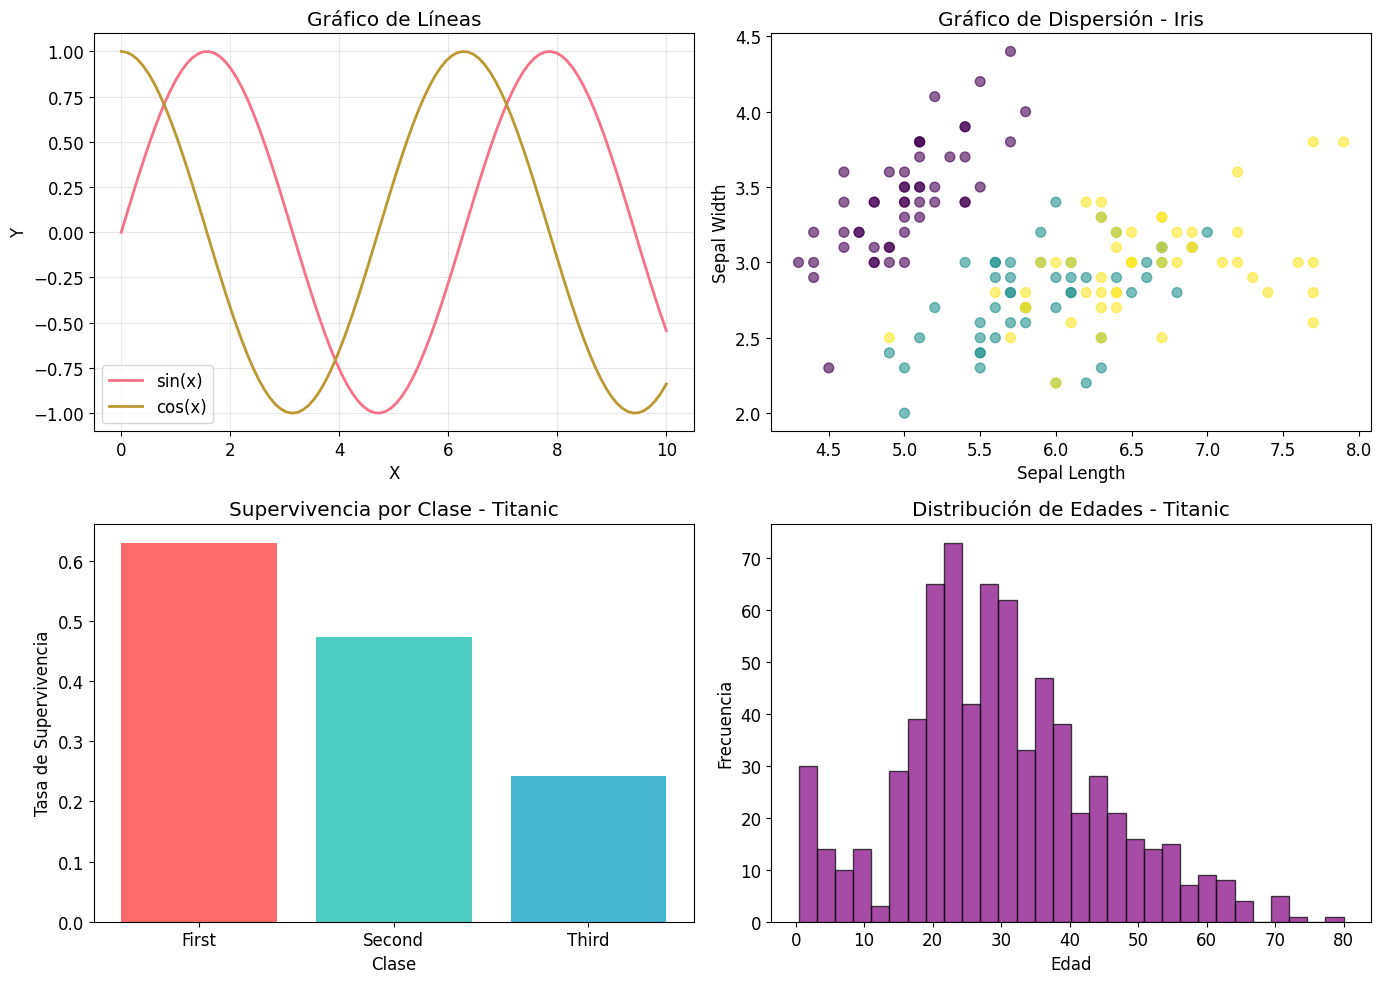

Gráficos básicos completados


In [8]:
# Cargar datos
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Línea
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
axes[0,0].plot(x, y1, label='sin(x)', linewidth=2)
axes[0,0].plot(x, y2, label='cos(x)', linewidth=2)
axes[0,0].set_title('Gráfico de Líneas')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('Y')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Dispersión
axes[0,1].scatter(iris['sepal_length'], iris['sepal_width'],
                  c=iris['species'].astype('category').cat.codes,
                  cmap='viridis', alpha=0.6, s=50)
axes[0,1].set_title('Gráfico de Dispersión - Iris')
axes[0,1].set_xlabel('Sepal Length')
axes[0,1].set_ylabel('Sepal Width')

# Gráfico 3: Barras
class_survival = titanic.groupby('class')['survived'].mean()
axes[1,0].bar(class_survival.index, class_survival.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,0].set_title('Supervivencia por Clase - Titanic')
axes[1,0].set_xlabel('Clase')
axes[1,0].set_ylabel('Tasa de Supervivencia')

# Gráfico 4: Histograma
axes[1,1].hist(titanic['age'].dropna(), bins=30, color='purple', edgecolor='black', alpha=0.7)
axes[1,1].set_title('Distribución de Edades - Titanic')
axes[1,1].set_xlabel('Edad')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('matplotlib_basico.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráficos básicos completados")


#Visualizaciones con Seaborn
# Parte 2: Visualizaciones Estadísticas con Seaborn
# Gráficos estadisticos

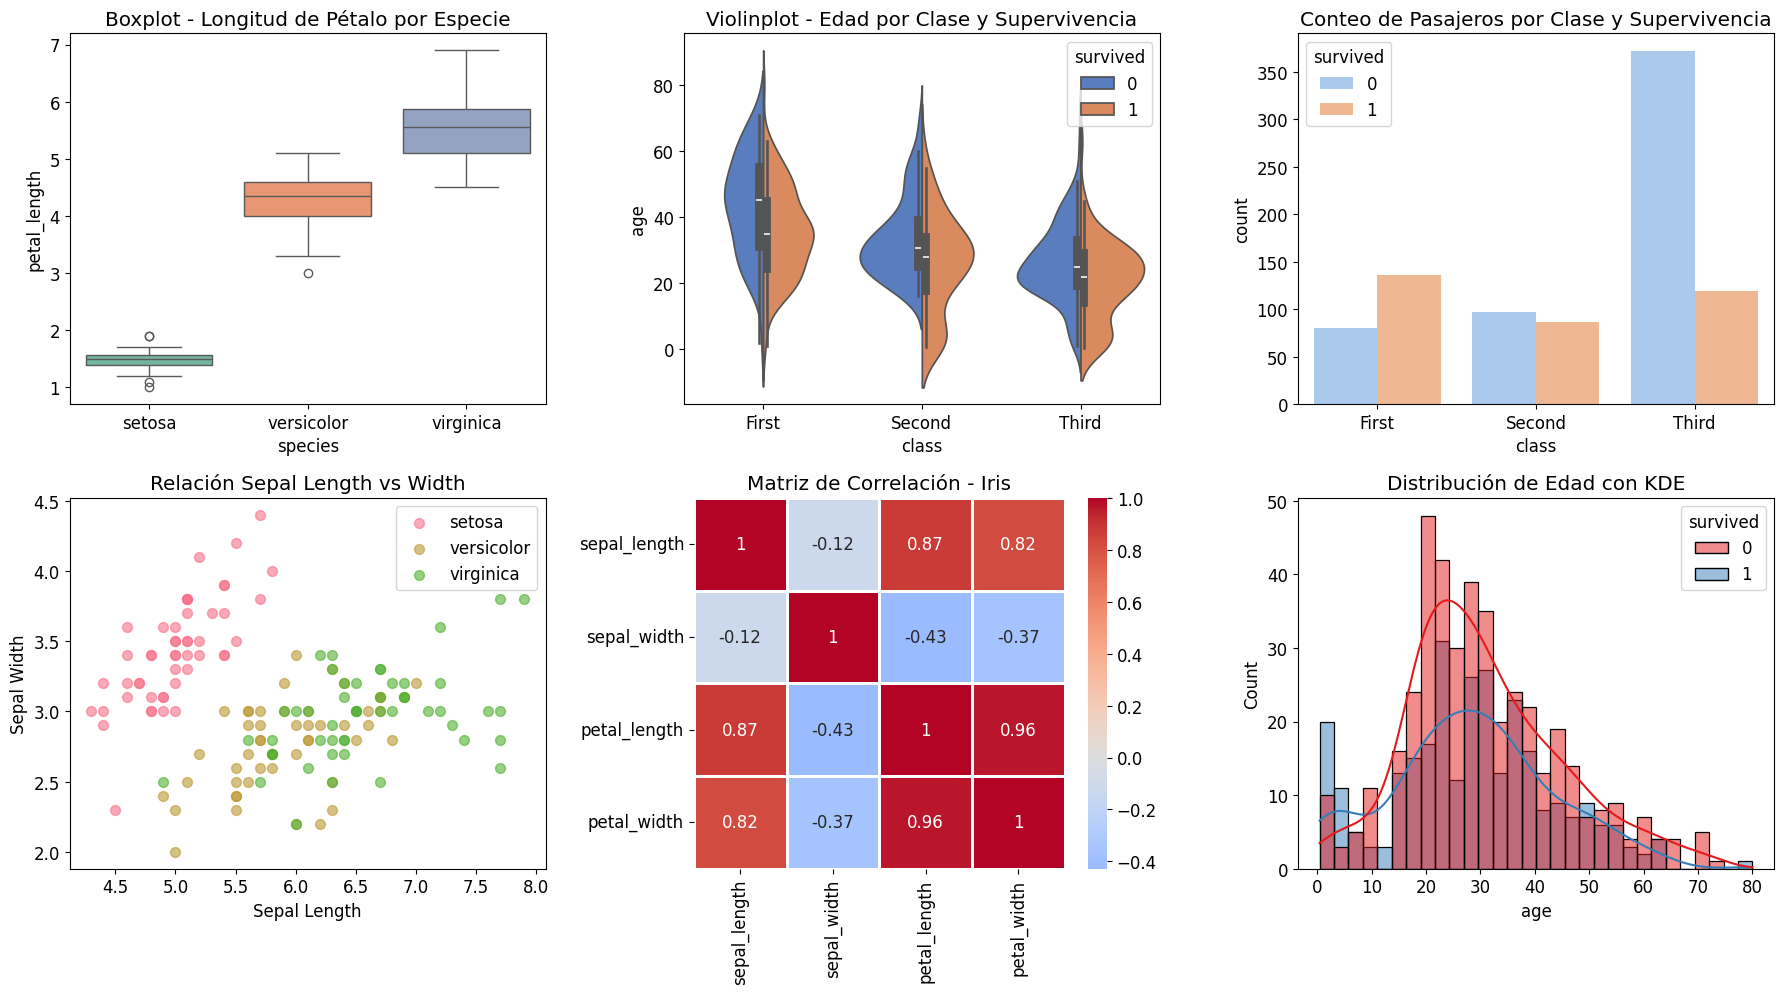

Visualizaciones estadísticas completadas


In [9]:
# Figura con múltiples visualizaciones de Seaborn
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gráfico 1: Boxplot
sns.boxplot(data=iris, x='species', y='petal_length', ax=axes[0,0], palette='Set2')
axes[0,0].set_title('Boxplot - Longitud de Pétalo por Especie')

# Gráfico 2: Violinplot
sns.violinplot(data=titanic, x='class', y='age', hue='survived',
               split=True, ax=axes[0,1], palette='muted')
axes[0,1].set_title('Violinplot - Edad por Clase y Supervivencia')

# Gráfico 3: Count plot
sns.countplot(data=titanic, x='class', hue='survived', ax=axes[0,2], palette='pastel')
axes[0,2].set_title('Conteo de Pasajeros por Clase y Supervivencia')

# Gráfico 4: Pairplot subset (solo 2 variables)
iris_subset = iris[['sepal_length', 'sepal_width', 'species']]
for species in iris['species'].unique():
    data = iris[iris['species'] == species]
    axes[1,0].scatter(data['sepal_length'], data['sepal_width'],
                      label=species, alpha=0.6, s=50)
axes[1,0].set_xlabel('Sepal Length')
axes[1,0].set_ylabel('Sepal Width')
axes[1,0].set_title('Relación Sepal Length vs Width')
axes[1,0].legend()

# Gráfico 5: Heatmap de correlación
correlation = iris.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            ax=axes[1,1], square=True, linewidths=1)
axes[1,1].set_title('Matriz de Correlación - Iris')

# Gráfico 6: Distribución con KDE
sns.histplot(data=titanic, x='age', hue='survived', kde=True,
             ax=axes[1,2], palette='Set1', bins=30)
axes[1,2].set_title('Distribución de Edad con KDE')

plt.tight_layout()
plt.savefig('seaborn_estadistico.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizaciones estadísticas completadas")


# Gráficos Interactivos con Plotly (Bonus)
# Plotly Interactivo

In [10]:
# Gráfico 1: Scatter interactivo con Iris
fig1 = px.scatter(iris, x='sepal_length', y='sepal_width',
                  color='species', size='petal_length',
                  hover_data=['petal_width'],
                  title='Iris Dataset - Scatter Interactivo')
fig1.show()

# Gráfico 2: Box plot interactivo con Titanic
fig2 = px.box(titanic, x='class', y='age', color='survived',
              title='Distribución de Edad por Clase y Supervivencia')
fig2.show()

# Gráfico 3: Gráfico de barras interactivo
survival_data = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()
fig3 = px.bar(survival_data, x='class', y='survived', color='sex',
              barmode='group',
              title='Tasa de Supervivencia por Clase y Sexo',
              labels={'survived': 'Tasa de Supervivencia'})
fig3.show()

print("Gráficos interactivos completados")

Gráficos interactivos completados


# Analisis comparativo
# Comparacion de Datasets

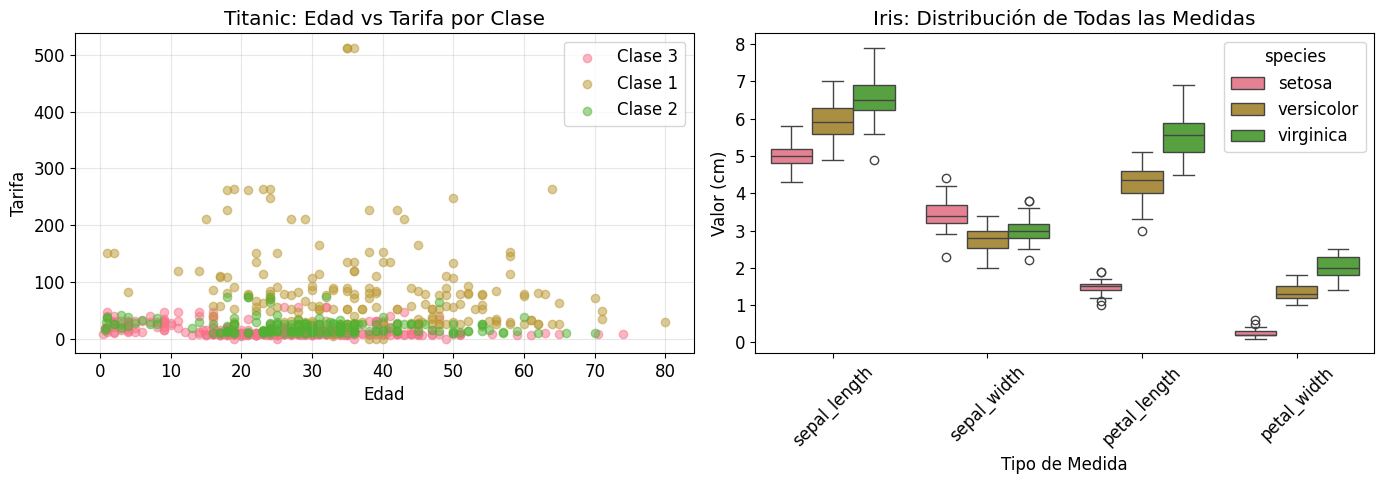

Análisis comparativo completado


In [11]:
# Análisis visual comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset Titanic - Supervivencia por edad y clase
for pclass in titanic['pclass'].unique():
    data = titanic[titanic['pclass'] == pclass]
    axes[0].scatter(data['age'], data['fare'],
                    label=f'Clase {pclass}', alpha=0.5)
axes[0].set_title('Titanic: Edad vs Tarifa por Clase')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Tarifa')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Dataset Iris - Todas las especies juntas
iris_melted = iris.melt(id_vars='species', var_name='medida', value_name='valor')
sns.boxplot(data=iris_melted, x='medida', y='valor', hue='species', ax=axes[1])
axes[1].set_title('Iris: Distribución de Todas las Medidas')
axes[1].set_xlabel('Tipo de Medida')
axes[1].set_ylabel('Valor (cm)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('analisis_comparativo.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis comparativo completado")

# Visualización Dataset Wine

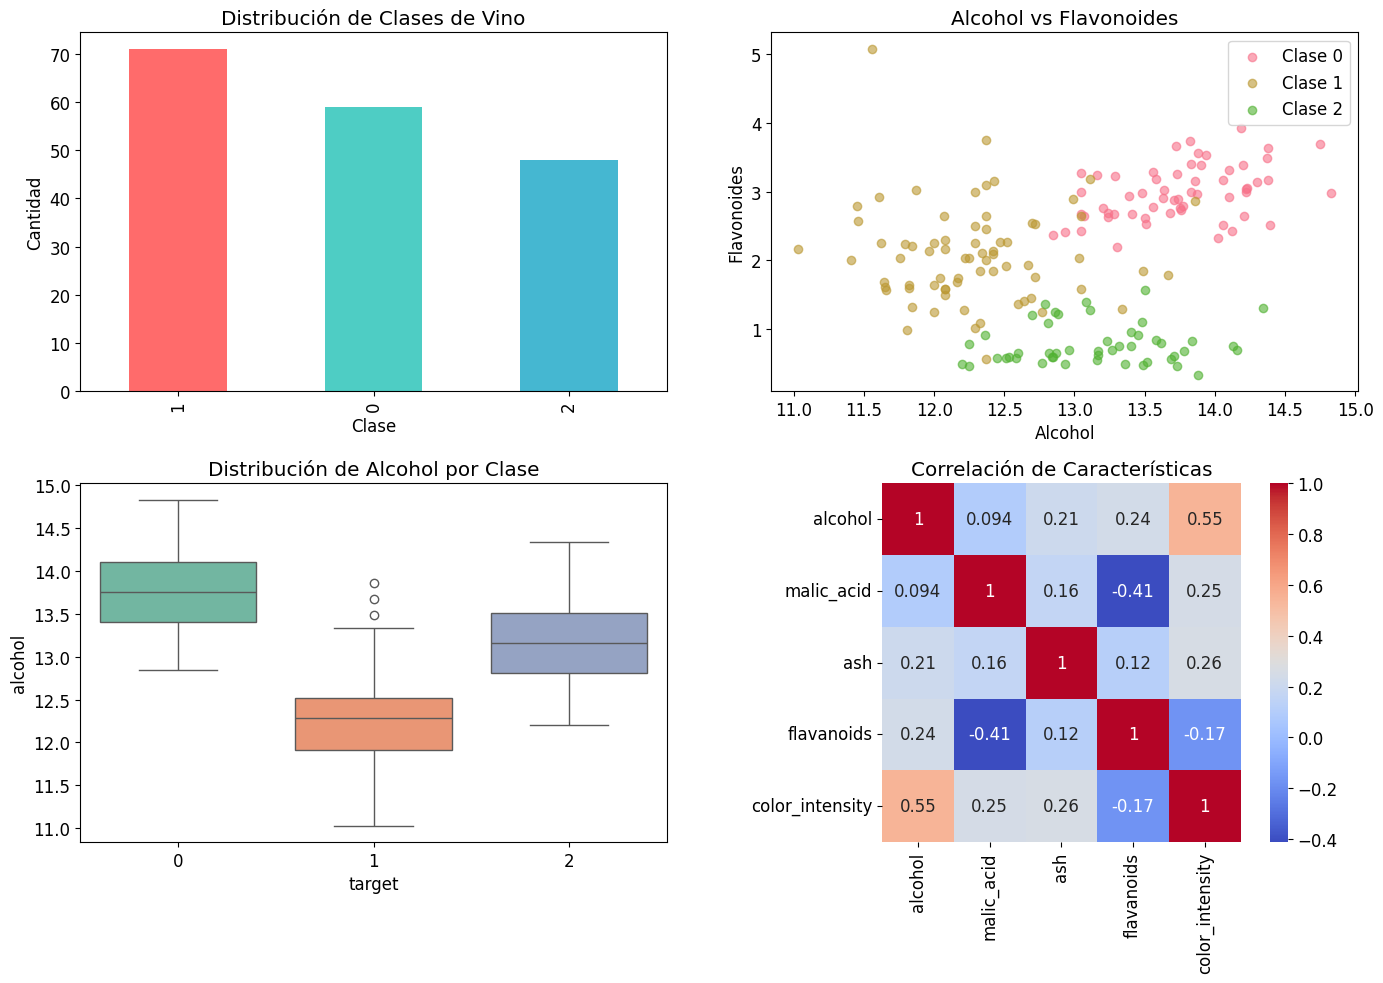

Visualizaciones Wine completadas


In [12]:
# Cargar Wine
from sklearn.datasets import load_wine
wine_data = load_wine()
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['target'] = wine_data.target

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de clases
wine['target'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Distribución de Clases de Vino')
axes[0,0].set_xlabel('Clase')
axes[0,0].set_ylabel('Cantidad')

# Gráfico 2: Scatter alcohol vs flavanoids
for target in wine['target'].unique():
    data = wine[wine['target'] == target]
    axes[0,1].scatter(data['alcohol'], data['flavanoids'], label=f'Clase {target}', alpha=0.6)
axes[0,1].set_title('Alcohol vs Flavonoides')
axes[0,1].set_xlabel('Alcohol')
axes[0,1].set_ylabel('Flavonoides')
axes[0,1].legend()

# Gráfico 3: Boxplot de alcohol por clase
sns.boxplot(data=wine, x='target', y='alcohol', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Distribución de Alcohol por Clase')

# Gráfico 4: Heatmap de correlación
correlation = wine[['alcohol', 'malic_acid', 'ash', 'flavanoids', 'color_intensity']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1,1], square=True)
axes[1,1].set_title('Correlación de Características')

plt.tight_layout()
plt.savefig('wine_visualizacion.png', dpi=300, bbox_inches='tight')
plt.show()
print("Visualizaciones Wine completadas")

# Visualizaciones Dataset Boston Housing

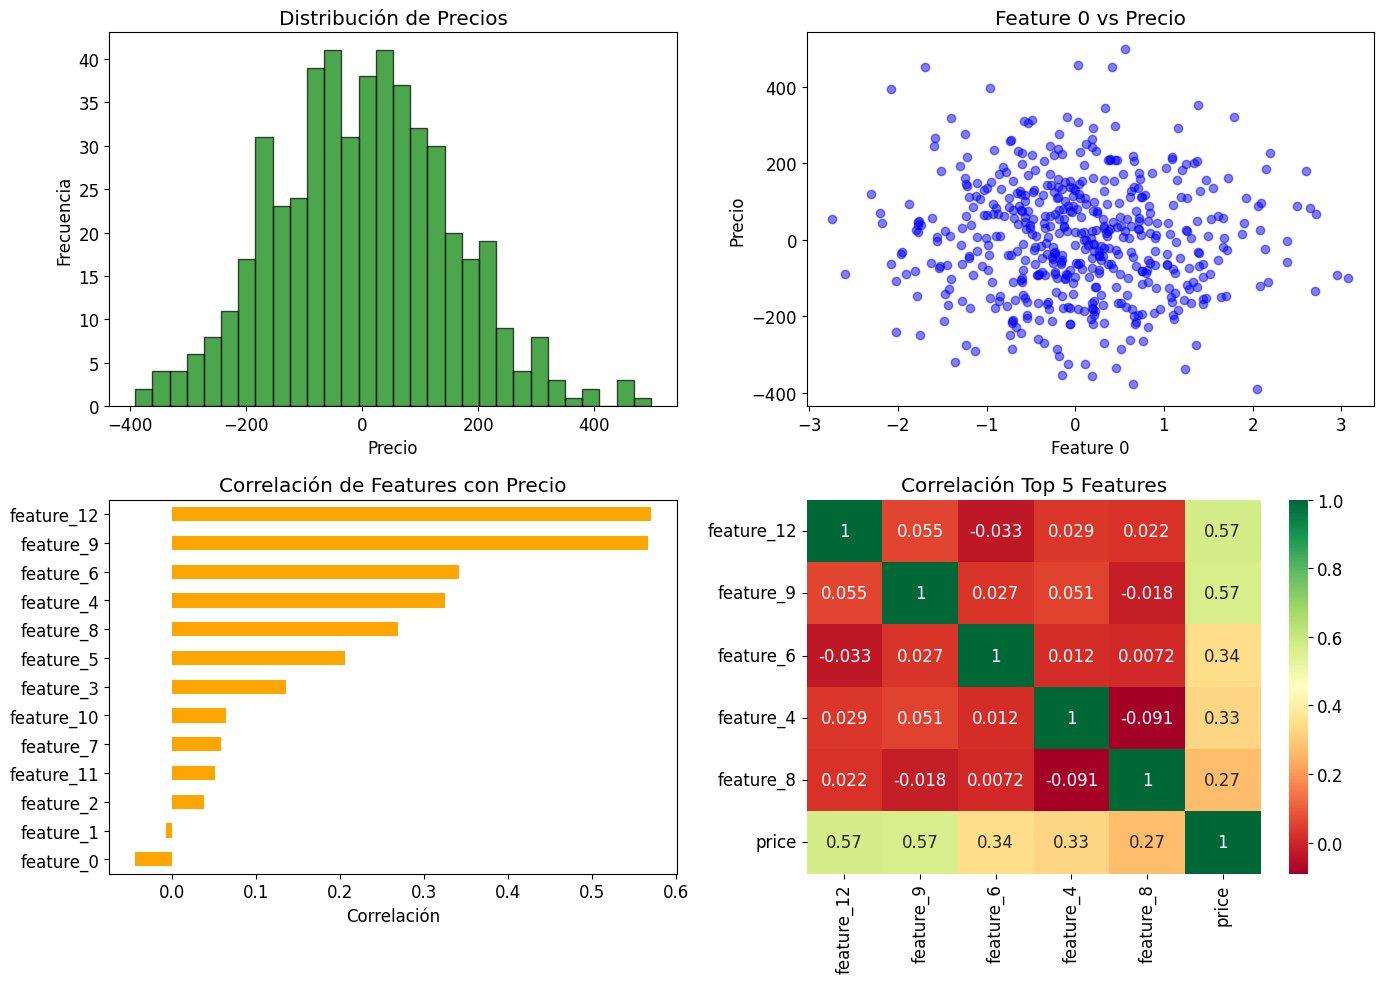

Visualizaciones Boston Housing completadas


In [13]:
# Crear Boston sintético
from sklearn.datasets import make_regression
X_housing, y_housing = make_regression(n_samples=506, n_features=13, noise=20, random_state=42)
boston = pd.DataFrame(X_housing, columns=[f'feature_{i}' for i in range(13)])
boston['price'] = y_housing

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de precios
axes[0,0].hist(boston['price'], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribución de Precios')
axes[0,0].set_xlabel('Precio')
axes[0,0].set_ylabel('Frecuencia')

# Gráfico 2: Scatter precio vs feature_0
axes[0,1].scatter(boston['feature_0'], boston['price'], alpha=0.5, color='blue')
axes[0,1].set_title('Feature 0 vs Precio')
axes[0,1].set_xlabel('Feature 0')
axes[0,1].set_ylabel('Precio')

# Gráfico 3: Correlación con precio
correlations = boston.corr()['price'].drop('price').sort_values()
correlations.plot(kind='barh', ax=axes[1,0], color='orange')
axes[1,0].set_title('Correlación de Features con Precio')
axes[1,0].set_xlabel('Correlación')

# Gráfico 4: Heatmap top features
top_features = boston.corr()['price'].abs().sort_values(ascending=False)[1:6].index.tolist()
sns.heatmap(boston[top_features + ['price']].corr(), annot=True, cmap='RdYlGn', ax=axes[1,1])
axes[1,1].set_title('Correlación Top 5 Features')

plt.tight_layout()
plt.savefig('boston_visualizacion.png', dpi=300, bbox_inches='tight')
plt.show()
print("Visualizaciones Boston Housing completadas")

# Visualizaciones Dataset Digits

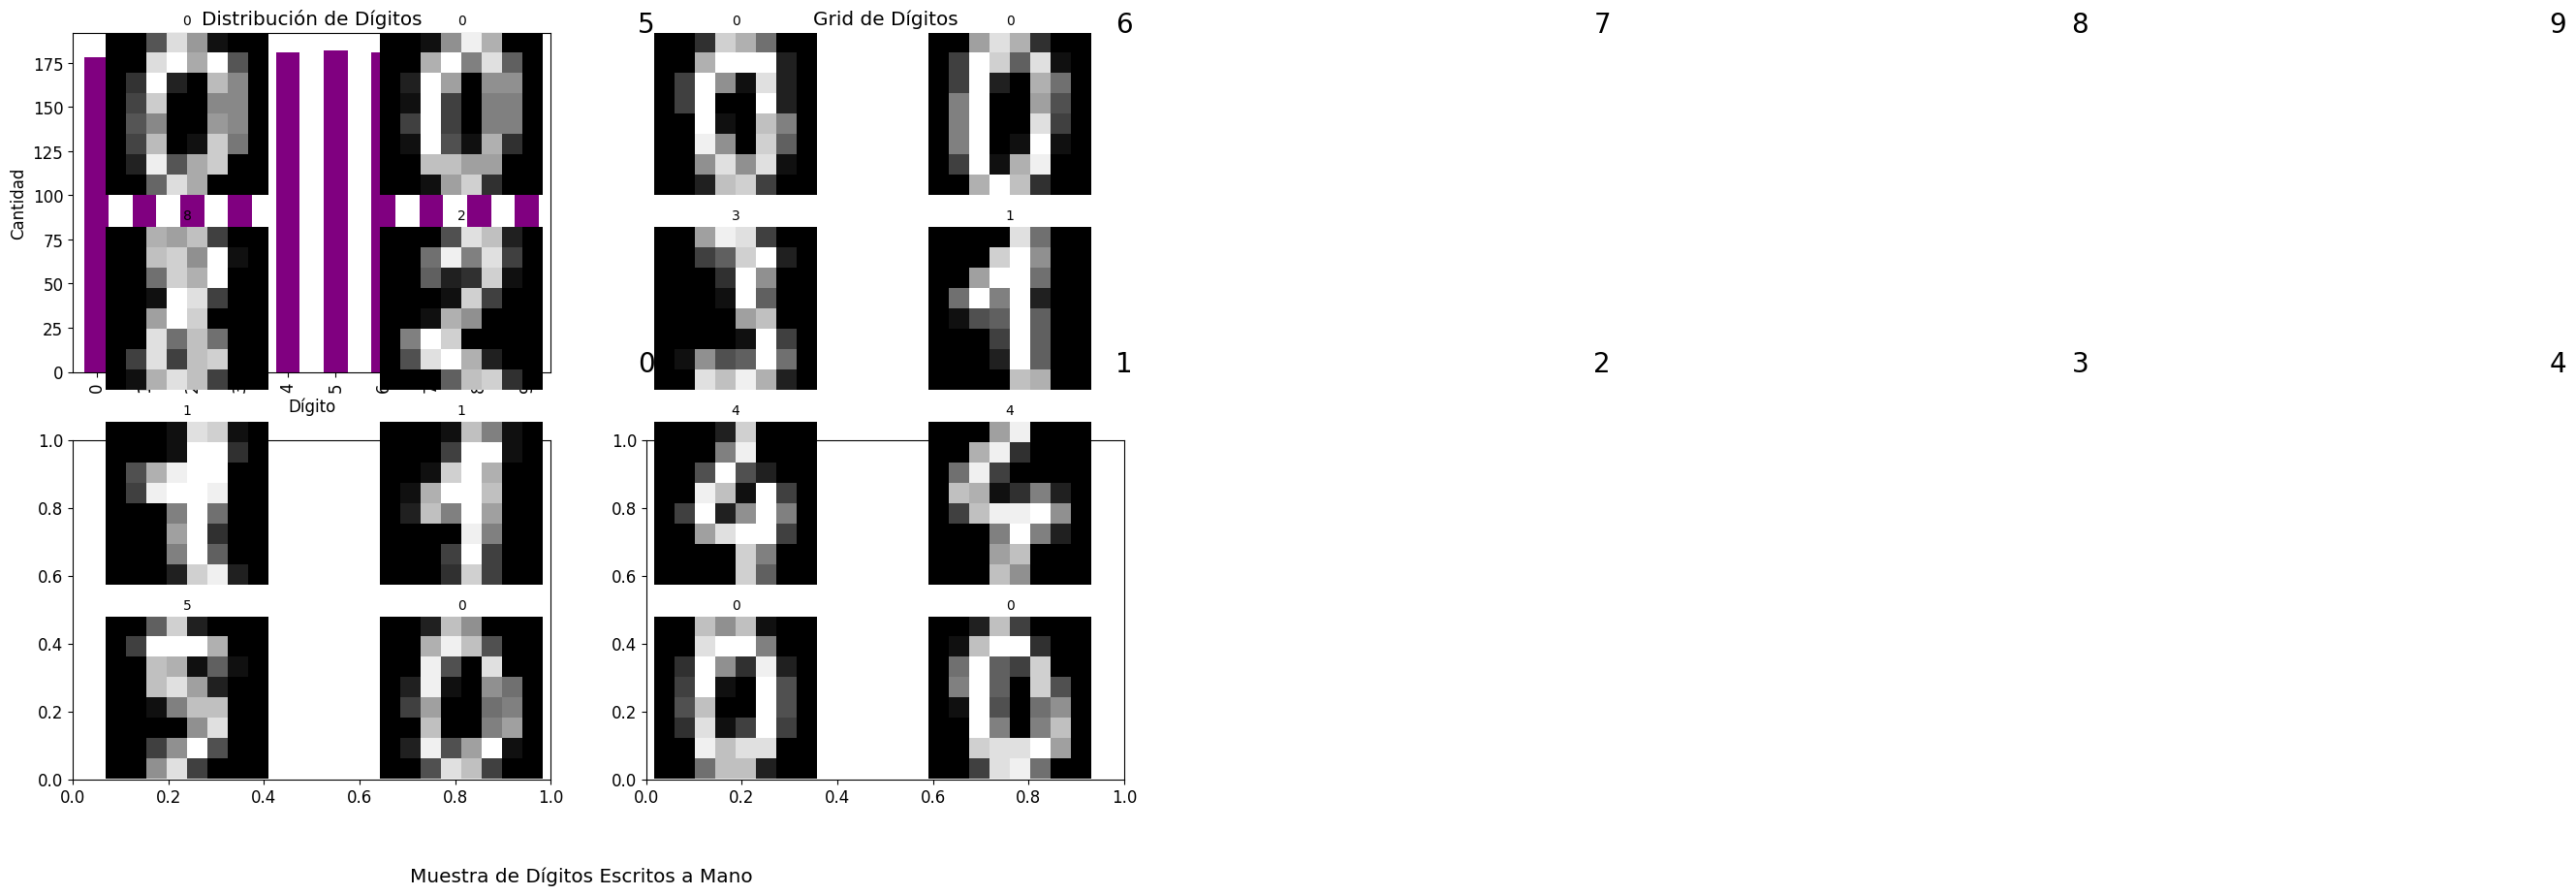

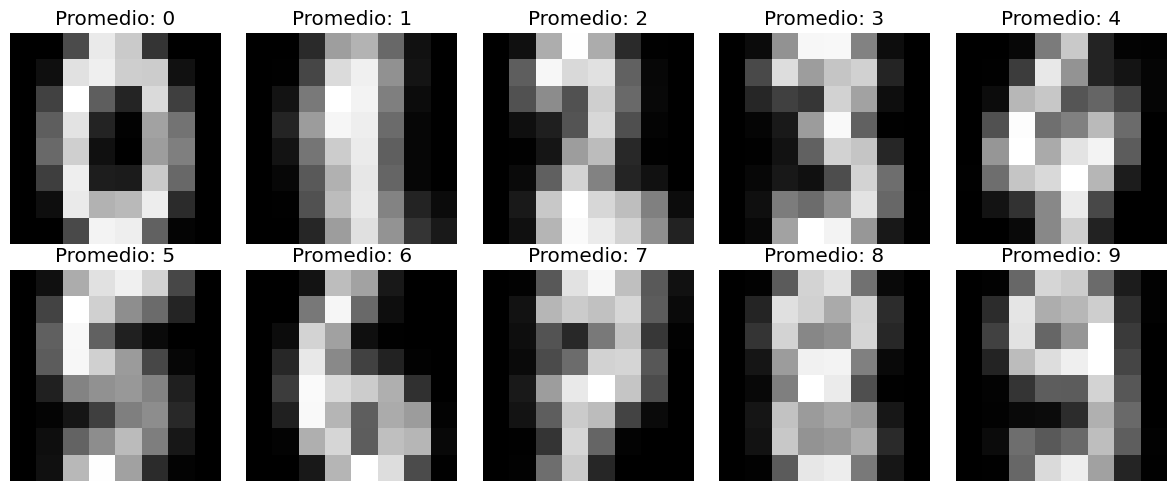

Visualizaciones Digits completadas


In [14]:
# Cargar Digits
from sklearn.datasets import load_digits
digits_data = load_digits()
digits = pd.DataFrame(digits_data.data)
digits['target'] = digits_data.target

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de dígitos
digits['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='purple')
axes[0,0].set_title('Distribución de Dígitos')
axes[0,0].set_xlabel('Dígito')
axes[0,0].set_ylabel('Cantidad')

# Gráfico 2: Ejemplos de dígitos
for i in range(10):
    idx = digits[digits['target'] == i].index[0]
    axes[0,1].text(i%5, i//5, str(i), fontsize=20, ha='center')
axes[0,1].set_title('Grid de Dígitos')
axes[0,1].axis('off')

# Gráfico 3: Muestras de dígitos
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(digits_data.images[i*10], cmap='gray')
    ax.set_title(f'{digits_data.target[i*10]}', fontsize=10)
    ax.axis('off')
plt.suptitle('Muestra de Dígitos Escritos a Mano', y=0.02)
plt.savefig('digits_muestras.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico 4: Promedio por dígito
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for digit in range(10):
    ax = axes[digit//5, digit%5]
    digit_images = digits_data.images[digits_data.target == digit]
    avg_digit = digit_images.mean(axis=0)
    ax.imshow(avg_digit, cmap='gray')
    ax.set_title(f'Promedio: {digit}')
    ax.axis('off')
plt.tight_layout()
plt.savefig('digits_promedios.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizaciones Digits completadas")


## Conclusiones del Autor

### Matplotlib:
- Se crean gráficos básicos: líneas, dispersión, barras e histogramas
- Se usan subplots para múltiples gráficos
- Se personaliza colores, etiquetas y estilos

### Seaborn:
- Se generan visualizaciones estadísticas avanzadas: boxplot, violinplot, heatmap
- Se realizar un análisis de distribuciones con KDE
- Se muestran matrices de correlación para identificar relaciones

### Plotly:
- Se muestran gráficos interactivos que permiten explorar los datos
- Se determina Zoom, hover y filtros dinámicos
- Es ideal para presentaciones y dashboards

# Datasets Visualizados:
**Titanic**: Supervivencia y demografía
**Iris:** Distribución de especies
**Wine:** Clasificación de vinos
**Boston Housing:** Relación precio-características
**Digits:** Reconocimiento de dígitos